In [225]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow

### Data Preprocessing

In [226]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [227]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [228]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

print(x_test.shape)

(10000, 784)


### OneHotEncoder

In [229]:
import keras
from keras.utils import np_utils

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


### Define Model

In [231]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(20, activation=LeakyReLU(), input_shape=(784,)))
model.add(Dense(20, activation=LeakyReLU()))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_56 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_57 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


/anaconda3/envs/NCTS/lib/python3.5/site-packages/keras/activations.py:197: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [232]:
model.fit(x_train, y_train, batch_size=128, epochs=25,verbose = 1) 

Epoch 1/25
60000/60000 [==============================] - 2s 27us/step - loss: 0.5799 - acc: 0.8376
Epoch 2/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.2903 - acc: 0.9178
Epoch 3/25
60000/60000 [==============================] - 1s 18us/step - loss: 0.2564 - acc: 0.9283
Epoch 4/25
60000/60000 [==============================] - 1s 18us/step - loss: 0.2354 - acc: 0.9336
Epoch 5/25
60000/60000 [==============================] - 1s 18us/step - loss: 0.2166 - acc: 0.9389
Epoch 6/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.2023 - acc: 0.9433: 0s - loss: 0.2024 - acc: 0.943
Epoch 7/25
60000/60000 [==============================] - 1s 18us/step - loss: 0.1902 - acc: 0.9461
Epoch 8/25
60000/60000 [==============================] - 1s 18us/step - loss: 0.1786 - acc: 0.9492
Epoch 9/25
60000/60000 [==============================] - 1s 18us/step - loss: 0.1672 - acc: 0.9521
Epoch 10/25
60000/60000 [==============================] - 1s 18us/s

### Result

In [233]:
score = model.evaluate(x_test.reshape(10000, 784), y_test)
score

10000/10000 [==============================] - 0s 39us/step


[0.13993144903620705, 0.9591]

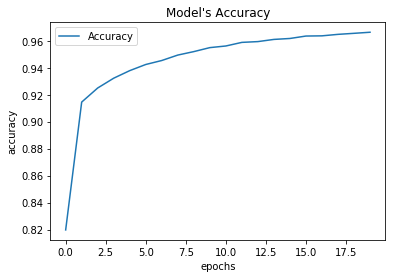

In [234]:
import matplotlib.pyplot as plt

plt.plot(Model.history['acc'], label='Accuracy')

plt.title("Model's Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc="best")
plt.show()

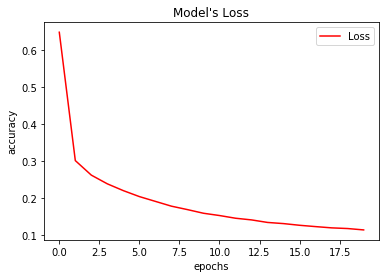

In [235]:
plt.plot(Model.history['loss'], label='Loss', color="red")

plt.title("Model's Loss")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc="best")
plt.show()

Test Number: 7919
Model predict： 8


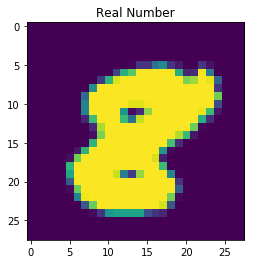

Test Number: 8606
Model predict： 7


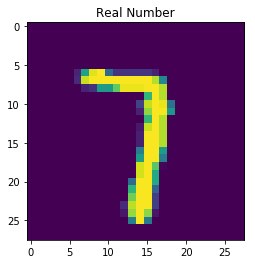

Test Number: 9839
Model predict： 7


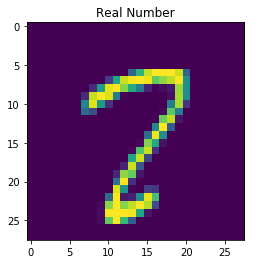

Test Number: 7789
Model predict： 2


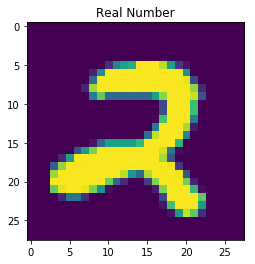

Test Number: 6074
Model predict： 2


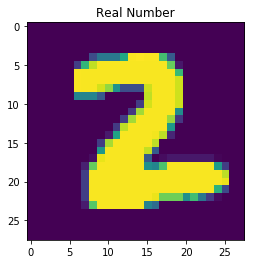

Test Number: 2504
Model predict： 1


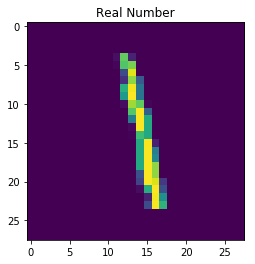

Test Number: 9312
Model predict： 6


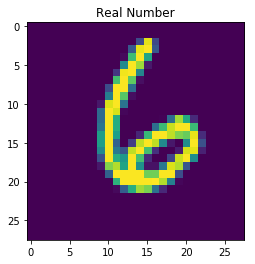

Test Number: 4186
Model predict： 0


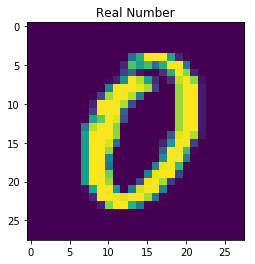

Test Number: 7957
Model predict： 4


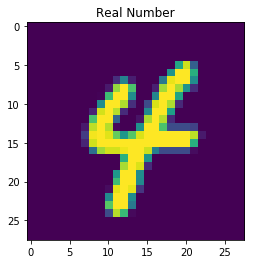

Test Number: 1846
Model predict： 5


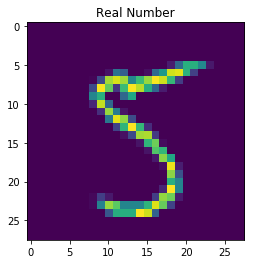

In [236]:
model_predict = model.predict_classes(x_test)

from matplotlib.pyplot import imshow
import random

for x in range(10):
    i = random.randint(1,10000)
    print('Test Number:', i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title("Real Number")
    print('Model predict：',model_predict[i])
    plt.pause(0.05)